In [2]:
import scipy as sci
import joblib as job
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV, MultiTaskLasso, MultiTaskElasticNetCV
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as sm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV


In [ ]:
import pyodbc

# Print available ODBC drivers
print(pyodbc.drivers())

# Connect to SQL Server
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};'
                      'SERVER=DESKTOP-6SO2SF8,1433;'
                      'DATABASE=MeMawBestKnowBest;'
                      'user=cyfo123;'
                      'password=cyfo1234;'
                      'Trusted_Connection=yes;')
sql_query = "select  * from [MeMawBestKnowBest].[dbo].[Income_Rent_Data]"
conn.execute(sql_query)
df = pd.read_sql(sql_query, conn)

# Print the DataFrame
print(df)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras 
from tensorflow.keras import layers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
%store -r glulamFeatures_traina
%store -r glulamFeatures_testa
%store -r glulamMargin_traina
%store -r glulamMargin_testa

In [ ]:
glulamMargin_traina.shape

(117359,)

# Linear Regression without regularization or cross validation

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lin_model1all= LinearRegression(normalize=True)
lin_model1all.fit(glulamFeatures_traina, glulamMargin_traina)


c:\Users\oladi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [ ]:
Margin_pred_model1all = lin_model1all.predict(glulamFeatures_traina)

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1all), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1all), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1all), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1all), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1all), 2))

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 0.65
R2 score = 0.65


In [ ]:
pd.set_option('display.max_rows', None)
coeff_model1all = pd.DataFrame(lin_model1all.coef_[0:29], index=glulamFeatures_traina.columns[0:29], 
                          columns=['glulamMargin_traina'])
coeff_model1all 


,glulamMargin_traina
StatQty3,-1.773479e+11
NetWeight3,3.113924e+10
OKLT,3.568634e+09
GLT,3.568634e+09
BLT,3.568634e+09
GGGBA,4.009387e+09
GGGBB,-1.377485e+08
GGGBI,-1.406268e+06
GGGCA,5.533218e-03
GGGBAOO,-1.144409e-04


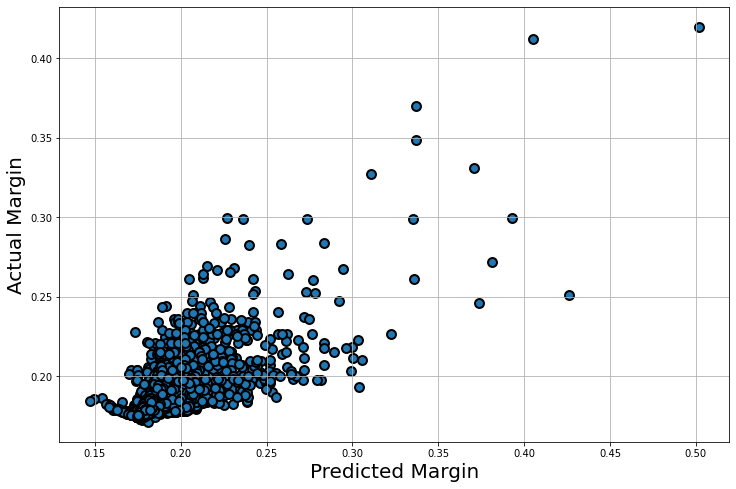

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted Margin",fontsize=20)
plt.ylabel("Actual Margin",fontsize=20)
plt.grid(1)
plt.scatter(glulamMargin_traina, Margin_pred_model1all,edgecolors=(0,0,0),lw=2,s=80)


In [ ]:
# Linear Regression  regularization or cross validation (LASSO)

In [ ]:
lin_model1allL = LassoCV(cv=10,verbose=0,normalize=True,eps=0.000001,n_alphas=7, tol=0.0001,max_iter=50000000)

In [ ]:

lin_model1allL.fit(glulamFeatures_traina, glulamMargin_traina)

c:\Users\oladi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, eps=1e-06, max_iter=50000000, n_alphas=7, normalize=True,
        verbose=0)

In [ ]:
Margin_pred_model1allL = lin_model1allL.predict(glulamFeatures_traina)

In [ ]:
#Train_Predict
print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allL), 2))

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 0.64
R2 score = 0.64


In [ ]:
pd.set_option('display.max_rows', None)
coeff_model1allL = pd.DataFrame(lin_model1allL.coef_[0:29], index=glulamFeatures_traina.columns[0:29], 
                          columns=['glulamMargin_traina'])
coeff_model1allL

,glulamMargin_traina
StatQty3,-0.000000
NetWeight3,0.287328
OKLT,-0.000000
GLT,0.000110
BLT,-0.000150
GGGBA,0.000000
GGGBB,0.000000
GGGBI,0.000000
GGGCA,0.000000
GGGBAOO,0.000000


In [ ]:
#Test_Predict

Test_Margin_pred_model1allL = lin_model1allL.predict(glulamFeatures_testa)

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_testa, Test_Margin_pred_model1allL), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_testa, Test_Margin_pred_model1allL), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_testa, Test_Margin_pred_model1allL), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_testa, Test_Margin_pred_model1allL), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_testa,Test_Margin_pred_model1allL), 2))


Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 0.54
R2 score = 0.54


# Ridge_Model

In [ ]:
lin_model1allR = Ridge(normalize=True, alpha=1)
lin_model1allR.fit(glulamFeatures_traina,glulamMargin_traina)
ceff_model1allR = pd.DataFrame(lin_model1allR.coef_[0:29], index=glulamFeatures_traina.columns[0:29], columns=['Ridge model coefficients'])
ceff_model1allR


c:\Users\oladi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


,Ridge model coefficients
StatQty3,0.042604
NetWeight3,0.042717
OKLT,0.000033
GLT,0.000049
BLT,-0.000072
GGGBA,0.000000
GGGBB,0.000000
GGGBI,0.000000
GGGCA,0.000000
GGGBAOO,0.000000


In [ ]:
#Train_Predict
Margin_pred_model1allR = lin_model1allR.predict(glulamFeatures_traina)

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allR), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allR), 2))

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 0.63
R2 score = 0.63


In [ ]:
#Test_Predict

Test_pred_model1allR = lin_model1allR.predict(glulamFeatures_testa)

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_testa, Test_pred_model1allR ), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_testa, Test_pred_model1allR ), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_testa, Test_pred_model1allR ), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_testa, Test_pred_model1allR ), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_testa,Test_pred_model1allR), 2))

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 0.41
R2 score = 0.4


In [ ]:

#RandomForest

Elastic Net

In [ ]:

lin_model1al4RandomeForest= RandomForestRegressor(n_estimators=120)
lin_model1al4RandomeForest.fit(glulamFeatures_traina,glulamMargin_traina)
lin_model1al4RandomeForest.score(glulamFeatures_traina,glulamMargin_traina)
#lin_model1al4RandomeForest.score(glulamFeatures_testa, glulamMargin_testa)
#ceff_model1alRandomforest= pd.DataFrame(lin_model1al4RandomeForest.coef_[0:29], index=glulamFeatures_traina.columns[0:29], columns=['RandomForest Model coefficients'])
#ceff_model1alRandomforest

#Train_Predict
Margin_pred_model1allRandomeForest = lin_model1al4RandomeForest.predict(glulamFeatures_traina)

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allRandomeForest), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allRandomeForest), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allRandomeForest), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allRandomeForest), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allRandomeForest), 2))

#Test_Predict
Margin_pred_model1allRandomeForest = lin_model1al4RandomeForest.predict(glulamFeatures_testa)

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_testa, Margin_pred_model1allRandomeForest ), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_testa, Margin_pred_model1allRandomeForest), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_testa, Margin_pred_model1allRandomeForest ), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_testa, Margin_pred_model1allRandomeForest ), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_testa,Margin_pred_model1allRandomeForest), 2))

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 0.86
R2 score = 0.86
Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 0.4
R2 score = 0.4


In [ ]:
#lin_model1allElastic= ElasticNet(alpha=100, l1_ratio=1,normalize=True,eps=0.000001,n_alphas=5, tol=0.0001,max_iter=5000)
#lin_model1allElastic.fit(glulamFeatures_traina,glulamMargin_traina)
#coeff_linElastic = pd.DataFrame(lin_model1allElastic.coef_[0:29], index=glulamFeatures_traina.columns[0:29], columns=['ElasticNet model coefficients'])
#coeff_linElastic

Neural Net

In [ ]:

model = Sequential([
    Dense(16, input_shape=(29,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
#optimizer=tf.keras.optimizer.RMSprop(0.001)
model.compile(Adam(lr=.0001), loss='mse', metrics=['mae','mse'])
Epochs=3
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(glulamFeatures_traina, glulamMargin_traina, batch_size=10, epochs=Epochs, validation_split=0.2, shuffle=True, verbose=2, callbacks=[early_stop])

c:\Users\oladi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/3


KeyboardInterrupt: 

In [ ]:
#Train_Predict
Margin_pred_model1allNeuralNet= model.predict(glulamFeatures_traina)


#Train_data

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allNeuralNet), 2))

3668/3668 [==============================] - 4s 1ms/step
Mean absolute error = 0.04
Mean squared error = 0.01
Median absolute error = 0.0
Explain variance score = -217.72
R2 score = -272.0


In [ ]:
#Test_data
Margin_pred_model1allNeuralNet= model.predict(glulamFeatures_testa)
print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_testa, Margin_pred_model1allNeuralNet), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_testa, Margin_pred_model1allNeuralNet), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_testa, Margin_pred_model1allNeuralNet ), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_testa, Margin_pred_model1allNeuralNet ), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_testa,Margin_pred_model1allNeuralNet), 2))

1572/1572 [==============================] - 2s 1ms/step
Mean absolute error = 0.18
Mean squared error = 0.03
Median absolute error = 0.19
Explain variance score = -30.8
R2 score = -327.02


In [ ]:
#Re-run the model to visualize and so,  save the model in
lin_model1allNeuralNet=model.fit(glulamFeatures_traina, glulamMargin_traina, batch_size=10, epochs=Epochs, validation_split=0.2, shuffle=True, verbose=2, callbacks=[early_stop])
 

#Visuals lin_model1allNeuralNet.history
NeuralNetVisuals= pd.DataFrame(lin_model1allNeuralNet.history)
NeuralNetVisuals['Epoch']= lin_model1allNeuralNet.epoch
NeuralNetVisuals.tail()

Epoch 1/3
9389/9389 - 23s - loss: 9.6685e-06 - mae: 0.0014 - mse: 9.6685e-06 - val_loss: 0.0345 - val_mae: 0.1847 - val_mse: 0.0345 - 23s/epoch - 2ms/step
Epoch 2/3
9389/9389 - 14s - loss: 9.7154e-06 - mae: 0.0014 - mse: 9.7154e-06 - val_loss: 0.0349 - val_mae: 0.1858 - val_mse: 0.0349 - 14s/epoch - 1ms/step
Epoch 3/3
9389/9389 - 14s - loss: 9.7340e-06 - mae: 0.0014 - mse: 9.7340e-06 - val_loss: 0.0339 - val_mae: 0.1831 - val_mse: 0.0339 - 14s/epoch - 1ms/step


,loss,mae,mse,val_loss,val_mae,val_mse,Epoch
0,0.00001,0.001432,0.00001,0.034477,0.184651,0.034477,0
1,0.00001,0.001445,0.00001,0.034897,0.185786,0.034897,1
2,0.00001,0.001419,0.00001,0.033899,0.183101,0.033899,2


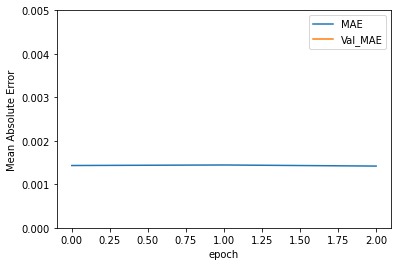

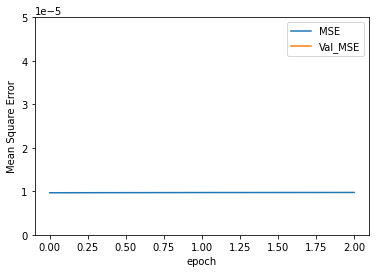

In [ ]:
def plot_in_model1allNeuralNet(history):
    NeuralNetVisuals=pd.DataFrame(lin_model1allNeuralNet.history)
    NeuralNetVisuals['epoch']= lin_model1allNeuralNet.epoch
    
    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('Mean Absolute Error') 
    plt.plot(NeuralNetVisuals['epoch'],NeuralNetVisuals['mae'],label='MAE')
    plt.plot(NeuralNetVisuals['epoch'],NeuralNetVisuals['val_mae'],label='Val_MAE')
    plt.legend()
    plt.ylim([0,0.005])   
    
    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('Mean Square Error') 
    plt.plot(NeuralNetVisuals['epoch'],NeuralNetVisuals['mse'],label='MSE')
    plt.plot(NeuralNetVisuals['epoch'],NeuralNetVisuals['val_mse'],label='Val_MSE')
    plt.legend()
    plt.ylim([0,0.00005]) 
plot_in_model1allNeuralNet(lin_model1allNeuralNet)

#Gradient Boosting

In [ ]:
lin_model1allGradientBoost= XGBRegressor(verbosity=0)
lin_model1allGradientBoost.fit(glulamFeatures_traina,glulamMargin_traina)
lin_model1allGradientBoost_Score=lin_model1allGradientBoost.score(glulamFeatures_traina,glulamMargin_traina)
lin_model1allGradientBoost_Score


NameError: name 'XGBRegressor' is not defined

In [ ]:

lin_model1allGradientBoost_Score_CV=cross_val_score(lin_model1allGradientBoost,glulamFeatures_traina,glulamMargin_traina, cv=10)
lin_model1allGradientBoost_Score_CV.mean()


: 

In [ ]:
Margin_pred_model1allGradientBoosting= lin_model1allGradientBoost.predict(glulamFeatures_traina)
#Train_data

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allGradientBoosting), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allGradientBoosting), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allGradientBoosting), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allGradientBoosting), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allGradientBoosting), 2))


: 

: 

: 